# Predicting Employee Attrition with Logistic Regression
## Introduction
This project focuses on predicting employee attrition using logistic regression, a popular machine learning technique for binary classification tasks. Employee attrition, the rate at which employees leave a company, is a critical concern for organizations. By analyzing various factors related to employees, we aim to develop a predictive model that can identify potential attrition risks and help in implementing effective retention strategies.

## Dataset Description
[click here to get database](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/code
)

The dataset used in this project is the "IBM HR Analytics Employee Attrition & Performance" dataset obtained from Kaggle. It contains a range of features including demographic information, job-related factors, and employee satisfaction levels. The target variable, "Attrition," indicates whether an employee has left the company or not.

## Methodology
1. Data Loading and Exploration
2. Data Preprocessing
3. Model Development
4. Model Evaluation


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

# 1. Data Loading and Exploration
- The project begins with importing necessary libraries such as pandas, numpy, seaborn, and scikit-learn.
- The dataset "IBM HR Analytics Employee Attrition & Performance" is loaded into a pandas DataFrame using pd.read_csv() function.
- The structure of the dataset is examined using df.head() and df.columns.


In [4]:
df = pd.read_csv("D:\Professionaal folders\DATA SCIENCE\Machine learning\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Checking for Missing Values

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

It appears that there are no missing values in any of the columns of the dataset. All columns have a count of zero missing values, as indicated by the output of the isnull().sum() function. This suggests that the dataset is complete in terms of data availability for all features.


In [6]:
# selecting columns 
df.columns 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Feature Selection
For feature selection, the following columns have been chosen from the dataset for further analysis and modeling:

- Age: The age of the employees.
- Attrition: The target variable indicating whether an employee has left the company (Yes) or not (No).
- BusinessTravel: Frequency of employee travel.
- DailyRate: Daily rate of pay.
- Department: Department in which the employee works.
- DistanceFromHome: Distance of employee residence from the workplace.
- Education: Employee education level.
- EducationField: Field of education of the employee.
- EnvironmentSatisfaction: Employee satisfaction with the work environment.
- Gender: Gender of the employee.
- HourlyRate: Hourly rate of pay.
- JobInvolvement: Level of job involvement of the employee.
- JobLevel: Level of the employee's job role.
- JobRole: Role of the employee in the company.
- JobSatisfaction: Employee satisfaction with the job.
- MaritalStatus: Marital status of the employee.
- MonthlyIncome: Monthly income of the employee.
- MonthlyRate: Monthly rate of pay.
- NumCompaniesWorked: Number of companies the employee has worked for.
- OverTime: Whether the employee works overtime (Yes/No).
- PercentSalaryHike: Percentage increase in salary.
- PerformanceRating: Employee performance rating.
- RelationshipSatisfaction: Satisfaction with work relationships.
- StandardHours: Standard number of working hours.
- StockOptionLevel: Level of stock options the employee has.
- TotalWorkingYears: Total years the employee has been working.
- TrainingTimesLastYear: Number of training sessions attended last year.
- WorkLifeBalance: Level of work-life balance perceived by the employee.
- YearsAtCompany: Number of years the employee has worked at the company.
- YearsInCurrentRole: Number of years the employee has been in the current role.
- YearsSinceLastPromotion: Number of years since the last promotion.
- YearsWithCurrManager: Number of years with the current manager.
## These features have been selected based on their potential significance in predicting employee attrition.

In [29]:
df = df[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 
      'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8.0,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10.0,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7.0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8.0,3,3,8,7,3,0


# 2. Data Preprocessing
- Initial data preprocessing steps involve handling missing values and selecting relevant features for analysis.
- Irrelevant columns are dropped from the dataset using DataFrame slicing (df = df[columns_to_keep]).
- Outliers in numerical features like "MonthlyIncome" and "TotalWorkingYears" are capped using the Interquartile Range (IQR) method.
- Box plots are used to visualize and verify the outlier treatment.
- Categorical variables are encoded using LabelEncoder from scikit-learn.

# Visualizing Outliers and treating the outlayers 

<Axes: >

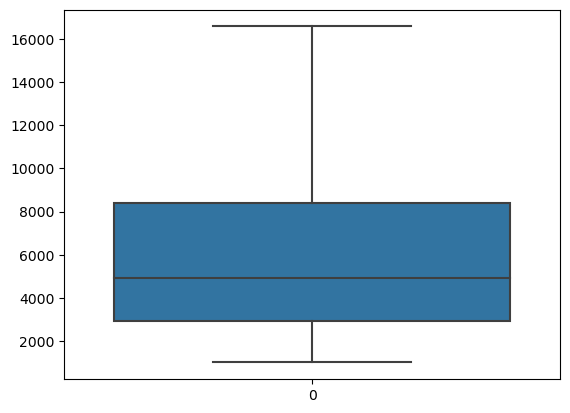

In [21]:
IQR = 8379-2911
UC = 8379 + (1.5*IQR)
df["MonthlyIncome"] = np.where(df["MonthlyIncome"]>UC,UC,df["MonthlyIncome"])
sns.boxplot(df.MonthlyIncome)

<Axes: >

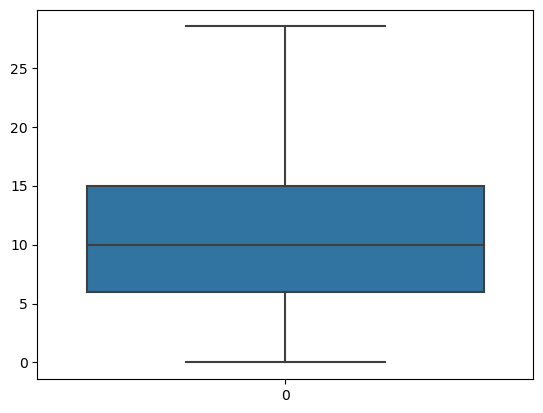

In [26]:
IQR = 15-6
UC = 15 + (1.5*IQR)
df["TotalWorkingYears"] = np.where(df["TotalWorkingYears"]>UC,UC,df["TotalWorkingYears"])
sns.boxplot(df.TotalWorkingYears)

In [28]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8.0,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10.0,3,3,10,7,1,7


# Converting Categorical Data to Numeric

In [30]:

le = LabelEncoder()
for i in ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']:
    df[i] = le.fit_transform(df[i])
df.head()    

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,1,80,0,8.0,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,80,1,10.0,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,2,80,0,7.0,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,80,0,8.0,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6.0,3,3,2,2,2,2


# 3. Model Development
- The dataset is split into training and testing sets using train_test_split() function from scikit-learn.
- A logistic regression model is instantiated using LogisticRegression() from scikit-learn.
- The model is trained on the training data using model.fit(x_train, y_train).

In [33]:
y = df[['Attrition']]
x = df[['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 
      'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1176, 31) (1176, 1)
(294, 31) (294, 1)


In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [36]:
model.fit(x_train,y_train)

D:\Downloads\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
model.score(x_train,y_train)

0.8477891156462585

In [40]:
prediction = model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
# prediction
res = pd.DataFrame()
res = pd.concat([x_test,res],axis=1)
res["Actual_servival"] = y_test
res["pred_servival"] = prediction 
res

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Actual_servival,pred_servival
272,28,2,1158,1,9,3,3,4,1,94,...,1,5.0,3,2,5,2,0,4,0,0
1113,32,0,1200,1,1,4,5,4,1,62,...,1,9.0,3,2,6,5,1,2,0,0
392,54,2,821,1,5,2,3,1,1,86,...,1,24.0,4,2,4,2,1,2,0,0
1300,34,2,810,2,8,2,5,2,1,92,...,2,10.0,5,3,10,8,4,8,0,0
836,29,2,408,2,23,1,1,4,0,45,...,1,11.0,3,1,11,8,3,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,42,2,1265,1,3,3,1,3,0,95,...,1,17.0,1,2,5,3,1,3,0,0
1282,33,2,867,1,8,4,1,4,1,90,...,1,14.0,1,3,10,8,7,6,0,0
956,56,2,206,0,8,4,1,4,1,99,...,0,28.5,4,3,7,3,7,7,0,0
239,32,2,515,1,1,3,1,4,1,62,...,0,4.0,2,1,3,2,1,2,1,0


# 4.Model Evaluation
- Model performance is evaluated using accuracy score calculated with model.score(x_test, y_test).
- Predictions are made on the test data using model.predict(x_test).
- Confusion matrix and accuracy score are calculated using confusion_matrix() and accuracy_score() from scikit-learn.
- Hyperparameter tuning is performed using GridSearchCV to find the best parameters for the logistic regression model.

In [42]:
# to evaluate the clasification we need to use confution matrix 
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(res["Actual_servival"] ,res["pred_servival"])

array([[244,   1],
       [ 46,   3]], dtype=int64)

In [43]:
accuracy_score(res["Actual_servival"] ,res["pred_servival"])

0.8401360544217688

In [45]:
param_grid = {
    'C': [1, 10],          # Regularization parameter
    'penalty': ['l1', 'l2'],                     # Type of regularization
    'solver': ['liblinear'] # Optimization algorithm
}

In [48]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

D:\Downloads\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [49]:
grid_search.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C= 10, penalty= 'l1', solver ='liblinear')

In [53]:
model.fit(x_train,y_train)

D:\Downloads\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [55]:
model.score(x_train,y_train)

0.875

In [56]:
prediction = model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
res = pd.DataFrame()
res = pd.concat([x_test,res],axis=1)
res["Actual_servival"] = y_test
res["pred_servival"] = prediction 
res

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Actual_servival,pred_servival
272,28,2,1158,1,9,3,3,4,1,94,...,1,5.0,3,2,5,2,0,4,0,0
1113,32,0,1200,1,1,4,5,4,1,62,...,1,9.0,3,2,6,5,1,2,0,0
392,54,2,821,1,5,2,3,1,1,86,...,1,24.0,4,2,4,2,1,2,0,0
1300,34,2,810,2,8,2,5,2,1,92,...,2,10.0,5,3,10,8,4,8,0,0
836,29,2,408,2,23,1,1,4,0,45,...,1,11.0,3,1,11,8,3,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,42,2,1265,1,3,3,1,3,0,95,...,1,17.0,1,2,5,3,1,3,0,0
1282,33,2,867,1,8,4,1,4,1,90,...,1,14.0,1,3,10,8,7,6,0,0
956,56,2,206,0,8,4,1,4,1,99,...,0,28.5,4,3,7,3,7,7,0,0
239,32,2,515,1,1,3,1,4,1,62,...,0,4.0,2,1,3,2,1,2,1,0


In [60]:
confusion_matrix(res["Actual_servival"] ,res["pred_servival"])

array([[235,  10],
       [ 29,  20]], dtype=int64)

In [65]:
accuracy_score(res["Actual_servival"] ,res["pred_servival"])

0.8673469387755102

# CONCLUTION 

Based on the confusion matrix and accuracy score, it appears that your model achieved an accuracy of approximately 86.73%. This indicates that the model performed reasonably well in predicting survival based on the features used. However, it's essential to interpret these results in the context of your specific project goals and domain knowledge.

Here are some conclusions you can draw from the project:

- Model Performance: The model demonstrates decent predictive performance, with an accuracy of nearly 87%. This suggests that the selected features are informative in predicting survival.

- Further Analysis: Consider analyzing misclassified instances and exploring feature importance to gain insights into areas where the model may be lacking. Additionally, you might experiment with different algorithms, hyperparameters, or feature engineering techniques to potentially improve performance further.

- Domain Knowledge Integration: Incorporating domain knowledge can enhance the interpretability and effectiveness of the model. Understanding which features are most relevant in the context of survival prediction can help refine the model and make it more actionable for stakeholders.

- Model Deployment: If the model meets the desired performance criteria, consider deploying it for real-world use. However, continue monitoring its performance and updating it as necessary to ensure its effectiveness over time.

Overall, while the model shows promise, there is room for refinement and further analysis to optimize its performance and utility for the intended application.